In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
X = df['YearsExperience'].values.reshape(-1,1) # input
Y =  df['Salary'].values

In [4]:
X.shape

(30, 1)

In [5]:
Y.shape

(30,)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(X,Y,test_size=0.3,random_state=1)

In [7]:
x_train.shape

(21, 1)

In [8]:
x_test.shape

(9, 1)

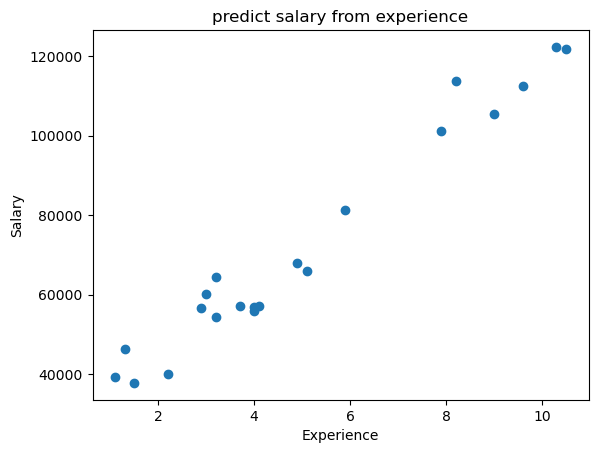

In [9]:
plt.scatter(x_train,y_train)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("predict salary from experience")
plt.show()

In [10]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
data = np.array([1,2,3,np.nan,4]).reshape(-1,1)

In [13]:
data

array([[ 1.],
       [ 2.],
       [ 3.],
       [nan],
       [ 4.]])

In [14]:
d1 = pd.DataFrame(data)
d1

,0
0,1.0
1,2.0
2,3.0
3,NaN
4,4.0


In [15]:
pd.DataFrame(data).mean()

0    2.5
dtype: float64

In [16]:
d1.fillna(pd.DataFrame(data).mean(),inplace=True)

In [17]:
d1

,0
0,1.0
1,2.0
2,3.0
3,2.5
4,4.0


In [24]:
# remove outliers

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train[np.abs(ss.fit_transform(x_train))<1.7]
y_train.reshape(-1,1)[np.abs(ss.fit_transform(x_train))<1.7]

array([101302., 113812.,  39891.,  37731., 105582.,  60150.,  81363.,
        57081.,  54445., 112635.,  46205.,  66029.,  39343.,  67938.,
        57189.,  64445.,  56957.,  55794.,  56642.])

In [ ]:
# m = cov(x1,y)/var(x1)
# c = mean(y) - m*mean(x1)

In [54]:
m = np.cov(x_train.reshape(1,-1), y_train.reshape(1,-1),  ddof = 0)[0,1]/np.cov(x_train.reshape(1,-1), y_train.reshape(1,-1),  ddof = 0)[0,0]
m

9202.233598254634

In [55]:
c = y_train.mean() - m * x_train.mean()
c

26049.57771544336

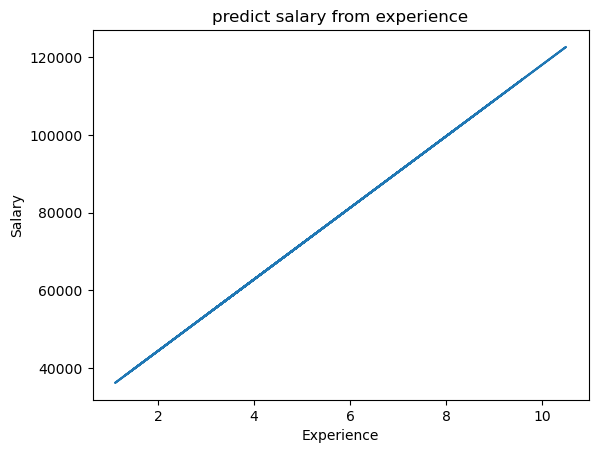

In [57]:
plt.plot(x_train,m*x_train+c)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("predict salary from experience")
plt.show()

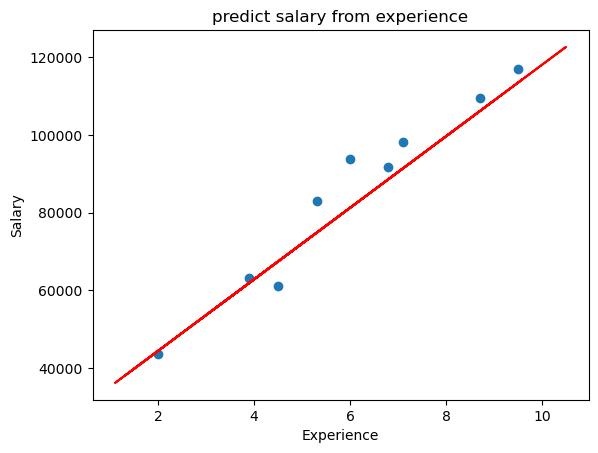

In [59]:
plt.plot(x_train,m*x_train+c,"red")
plt.scatter(x_test,y_test)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("predict salary from experience")
plt.show()

# Linear model

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
lr.intercept_

26049.57771544336

In [62]:
lr.coef_

array([9202.23359825])

In [27]:
lr.predict([[4]])

array([62858.51210846])

In [70]:
y_preds_train = lr.predict(x_train)
y_preds_test = lr.predict(x_test.reshape(-1,1))

In [71]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_preds_train)

30183144.97846198

In [72]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preds_test)

39139215.99958858

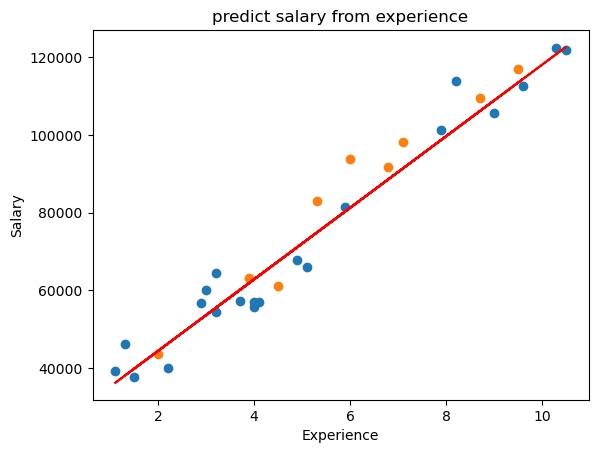

In [75]:
plt.scatter(x_train,y_train)
plt.plot(x_train,m*x_train+c,"red")
plt.scatter(x_test,y_test)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("predict salary from experience")
plt.show()

In [76]:
from sklearn.linear_model import Ridge
l2_model = Ridge(alpha=1)
l2_model.fit(x_train,y_train)

mean_squared_error(y_test,l2_model.predict(x_test))

39895968.92097672

In [ ]:
# 30183144.97846198 train
# 39139215.99958858 test

No regularization , train error:  30183144.97846198
No regularization , train error:  39139215.99958858
Regularization , train error:  32160911.14492348
Regularization , train error:  47540579.774175525


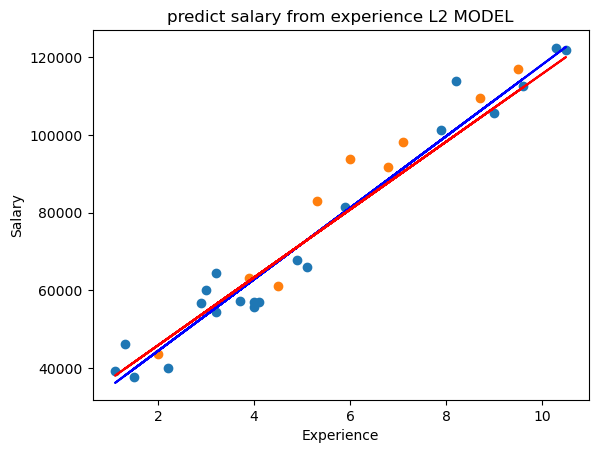

In [94]:
print("No regularization , train error: ",mean_squared_error(y_train,y_preds_train))
print("No regularization , train error: ",mean_squared_error(y_test,y_preds_test))
from sklearn.linear_model import Ridge
l2_model = Ridge(alpha=10)
l2_model.fit(x_train,y_train)

print("Regularization , train error: ",mean_squared_error(y_train,l2_model.predict(x_train)))
print("Regularization , train error: ",mean_squared_error(y_test,l2_model.predict(x_test)))
plt.scatter(x_train,y_train)
plt.plot(x_train,m*x_train+c,"blue") # optimal line
c_l2 = l2_model.intercept_
m_l2 = l2_model.coef_[0]
plt.plot(x_train,m_l2*x_train+c_l2,"red") # near optimal line
plt.scatter(x_test,y_test)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("predict salary from experience L2 MODEL")
plt.show()

No regularization , train error:  30183144.97846198
No regularization , train error:  39139215.99958858
Regularization , train error:  30183145.093001463
Regularization , train error:  39140919.00198838


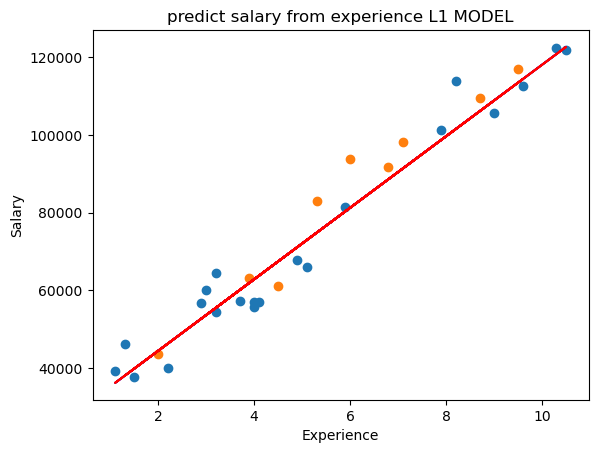

In [97]:
print("No regularization , train error: ",mean_squared_error(y_train,y_preds_train))
print("No regularization , train error: ",mean_squared_error(y_test,y_preds_test))
from sklearn.linear_model import Lasso
l1_model = Lasso(alpha=1)
l1_model.fit(x_train,y_train)

print("Regularization , train error: ",mean_squared_error(y_train,l1_model.predict(x_train)))
print("Regularization , train error: ",mean_squared_error(y_test,l1_model.predict(x_test)))
plt.scatter(x_train,y_train)
plt.plot(x_train,m*x_train+c,"blue") # optimal line
c_l2 = l2_model.intercept_
m_l2 = l2_model.coef_[0]
plt.plot(x_train,m_l2*x_train+c_l2,"red") # near optimal line
plt.scatter(x_test,y_test)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("predict salary from experience L1 MODEL")
plt.show()

In [41]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error

In [35]:
mses_diff_alphas = []
alphas = np.linspace(0,0.0001,5000)
for i in alphas:
    model = Ridge(alpha=i)
    model.fit(x_train,y_train)
    preds_test = model.predict(x_test)
    mses_diff_alphas.append(mean_squared_error(y_test,preds_test))

In [36]:
mses_diff_alphas

[39139215.99958858,
 39139216.01451608,
 39139216.02944359,
 39139216.04437114,
 39139216.05929849,
 39139216.07422601,
 39139216.08915356,
 39139216.10408099,
 39139216.11900845,
 39139216.13393593,
 39139216.14886343,
 39139216.16379089,
 39139216.17871833,
 39139216.19364589,
 39139216.208573356,
 39139216.22350087,
 39139216.2384283,
 39139216.25335582,
 39139216.26828321,
 39139216.28321074,
 39139216.29813818,
 39139216.31306568,
 39139216.327993296,
 39139216.34292069,
 39139216.35784811,
 39139216.37277569,
 39139216.38770308,
 39139216.40263062,
 39139216.417558044,
 39139216.43248559,
 39139216.447412975,
 39139216.46234057,
 39139216.477267995,
 39139216.49219545,
 39139216.507122904,
 39139216.522050425,
 39139216.53697792,
 39139216.55190538,
 39139216.56683291,
 39139216.5817604,
 39139216.59668788,
 39139216.61161539,
 39139216.62654278,
 39139216.6414703,
 39139216.65639775,
 39139216.67132527,
 39139216.68625274,
 39139216.70118019,
 39139216.7161077,
 39139216.7310352

In [40]:
mses_diff_alphas = []
alphas = np.linspace(0,0.0001,5000)
for i in alphas:
    model = Lasso(alpha=i)
    model.fit(x_train,y_train)
    preds_test = model.predict(x_test)
    mses_diff_alphas.append(mean_squared_error(y_test,preds_test))

min(mses_diff_alphas)

39139215.99958865

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
mses_diff = []
alphas = np.linspace(0,1,10)
for i in alphas:
    model = ElasticNet(l1_ratio=i)
    model.fit(x_train,y_train)
    preds_test = model.predict(x_test)
    mses_diff.append(mean_squared_error(y_test,preds_test))

min(mses_diff)

39140919.0019884

In [45]:
mses_diff

[58430863.874083996,
 56011352.82725813,
 53645428.4595812,
 51338944.32223645,
 49098225.569200024,
 46930109.24568329,
 44841988.413378276,
 42841860.52265772,
 40938380.49093763,
 39140919.0019884]

In [47]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()
X = dataset.data
Y = dataset.target

In [52]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [49]:
Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [50]:
dataset.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,-0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [51]:
X.shape

(442, 10)

In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

ss = StandardScaler()
scaled_x_train = ss.fit_transform(x_train)
scaled_x_test = ss.fit_transform(x_test)

In [57]:
model = Ridge()

mses_diff_alphas = []
alphas = np.linspace(0,0.0001,100)
for i in alphas:
    model = Ridge(alpha=i)
    model.fit(scaled_x_train,y_train)
    preds_test = model.predict(scaled_x_test)
    mses_diff_alphas.append(mean_squared_error(y_test,preds_test))
min(mses_diff_alphas)

2879.744196860214

In [58]:
mses_diff_alphas

[2879.744196860214,
 2879.744203110492,
 2879.7442093607715,
 2879.7442156110496,
 2879.74422186133,
 2879.74422811161,
 2879.7442343618923,
 2879.7442406121727,
 2879.744246862456,
 2879.7442531127394,
 2879.744259363023,
 2879.744265613308,
 2879.7442718635925,
 2879.7442781138784,
 2879.7442843641647,
 2879.7442906144506,
 2879.744296864739,
 2879.7443031150274,
 2879.744309365316,
 2879.7443156156055,
 2879.7443218658964,
 2879.7443281161877,
 2879.744334366479,
 2879.7443406167713,
 2879.7443468670635,
 2879.744353117357,
 2879.7443593676508,
 2879.7443656179457,
 2879.744371868242,
 2879.744378118538,
 2879.7443843688343,
 2879.744390619132,
 2879.7443968694292,
 2879.7444031197288,
 2879.7444093700274,
 2879.744415620327,
 2879.744421870628,
 2879.7444281209278,
 2879.7444343712305,
 2879.744440621533,
 2879.744446871836,
 2879.7444531221395,
 2879.7444593724445,
 2879.744465622749,
 2879.744471873055,
 2879.7444781233617,
 2879.7444843736685,
 2879.7444906239766,
 2879.74449687

In [62]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
X = dataset.data
Y = dataset.target

In [63]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

ss = StandardScaler()
scaled_x_train = ss.fit_transform(x_train)
scaled_x_test = ss.fit_transform(x_test)

In [61]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [69]:
model = Ridge()

mses_diff_alphas = []
alphas = np.linspace(0,1000,1000)
for i in alphas:
    model = Ridge(alpha=i)
    model.fit(scaled_x_train,y_train)
    preds_test = model.predict(scaled_x_test)
    mses_diff_alphas.append(mean_squared_error(y_test,preds_test))
least_index = mses_diff_alphas.index(min(mses_diff_alphas))
print(alphas[least_index])
min(mses_diff_alphas)

39.03903903903904


0.516431941071798

In [74]:
mses_diff_alphas = []
alphas = np.linspace(0,0.0001,500)
for i in alphas:
    model = Lasso(alpha=i)
    model.fit(scaled_x_train,y_train)
    preds_test = model.predict(scaled_x_test)
    mses_diff_alphas.append(mean_squared_error(y_test,preds_test))
least_index = mses_diff_alphas.index(min(mses_diff_alphas))
print(alphas[least_index])
min(mses_diff_alphas)

0.0


0.5166044589686754

In [76]:
mses_diff_alphas

[0.5166044589686754,
 0.5166044659543134,
 0.5166044729263808,
 0.5166044799405511,
 0.5166044869531864,
 0.5166044939014152,
 0.5166045009018809,
 0.5166045078587609,
 0.51660451494472,
 0.5166045220197526,
 0.5166045290823252,
 0.516604536130758,
 0.5166045431632093,
 0.516604550177661,
 0.5166045571719015,
 0.5166045641435066,
 0.5166045710898199,
 0.5166045783876367,
 0.5166045853107833,
 0.5166045926186887,
 0.5166045995154748,
 0.5166046063773664,
 0.5166046137003925,
 0.5166046205285882,
 0.5166046278616983,
 0.5166046351998603,
 0.5166046419951854,
 0.5166046493434295,
 0.5166046560962433,
 0.5166046634545672,
 0.5166046708179431,
 0.5166046775282201,
 0.5166046849016735,
 0.516604692280179,
 0.5166046989423779,
 0.5166047063309583,
 0.5166047137245907,
 0.516604720332638,
 0.5166047277363427,
 0.5166047351450993,
 0.5166047416923379,
 0.5166047491111638,
 0.5166047565350417,
 0.5166047639639714,
 0.5166047704481187,
 0.5166047778871143,
 0.516604785331162,
 0.5166047927802616,

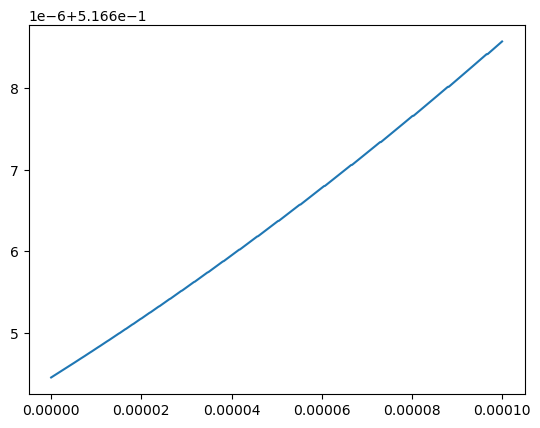

In [75]:
plt.plot(np.linspace(0,0.0001,500),mses_diff_alphas)
plt.show()

In [77]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [78]:
X = df['YearsExperience'].values.reshape(-1,1)
Y = df['Salary'].values

In [79]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [89]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(eta0=0.01,penalty='l2')
model.fit(x_train,y_train)

SGDRegressor()

In [90]:
model.predict(x_test.reshape(-1,1))

array([ 73201.54142608,  91510.98551759,  58960.86268824,  80321.880795  ,
        65064.01071874,  88459.41150234, 115923.57763961,  39634.22725831,
       107786.04693227])